# TensorFlow & Keras

I am starting a small personal tutorial with TensorFlow and Keras. The purpose of this notebook is TF installation and gentle introduction into this module.

__________

In [1]:
import numpy as np
import pandas as pd
import sklearn as sklearn
import matplotlib.pyplot as plt
import seaborn as sns

<div class="alert alert-block alert-warning"><b>Installation</b></div>

*It's easier create own env in anaconda and install TensorFlow and after that jupyter notebook. Also is necessary to define python version not to be higher than 3.7*

In [ ]:
# conda create --name name_of_your_env
# conda install -c conda-forge tensorflow=2.0 python=3.7 #forge is improtant here :))
# conda install jupyter notebook 
# conda install other dependecies ...
# jupyter notebook

*In my case using only install tensorflow=2.0 withou python version or conda-forge lead to non working environment, I wasn't able to import tensorflow, here is a link for solving this issue: https://stackoverflow.com/questions/38221181/no-module-named-tensorflow-in-jupyter*

In [1]:
from platform import python_version

print(python_version())

3.7.8


*Just checking that I am not having python version above 3.7.x.*

In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.1.0


*Ternsorflow is successfully imported.*

## Simple classification with TernsorFlow

<div class="alert alert-block alert-warning"><b>Breast Cancer Data</b></div>

In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
data = load_breast_cancer()

In [6]:
data.keys(), data.data.shape, type(data)

(dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']),
 (569, 30),
 sklearn.utils.Bunch)

In [7]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [8]:
data.data.shape, data.target.shape

((569, 30), (569,))

In [9]:
data.target[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
data.data[:1]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01]])

In [11]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

*So this is quite well know data set, and I will just proceed with simple classification using TF.*

<div class="alert alert-block alert-warning"><b>Training, testing and evaluating</b></div>

In [12]:
from sklearn.model_selection import train_test_split 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3)
#splitting my data

In [14]:
N_inputs, D_outputs = X_train.shape #necessary for TF

*Now just simple scaling, for Deep Learning more important than in Machine Learning models! For example randomforrest etc. does not need scaling.*

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Ternsorflow part**

*Creating model.*

In [16]:
my_model = tf.keras.models.Sequential ([ #I am defining my Sequential from keras
    tf.keras.layers.Input(shape=(D_outputs,)), #here we specify size of inputs
    tf.keras.layers.Dense(1, activation="sigmoid") #dense and activation via sigmoid function
]) #using our input
# or
# my_model = tf.kears.models.Sequential()
# my_model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation="sigmoid"))

*Creating a compiler.*

In [17]:
my_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
#Here I am defining my cost function, metrics evaluations 
# (accuracy meaning True predictions / total and optimizer

*Training and evaluating.*

In [76]:
result = my_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)
#where epochs is number of iterations

Train on 398 samples, validate on 171 samples
Epoch 1/5
398/398 [==============================] - 1s 1ms/sample - loss: 0.6474 - accuracy: 0.6256 - val_loss: 0.6453 - val_accuracy: 0.6550
Epoch 2/5
398/398 [==============================] - 0s 90us/sample - loss: 0.5754 - accuracy: 0.7111 - val_loss: 0.5819 - val_accuracy: 0.7135
Epoch 3/5
398/398 [==============================] - 0s 100us/sample - loss: 0.5163 - accuracy: 0.7839 - val_loss: 0.5286 - val_accuracy: 0.7836
Epoch 4/5
398/398 [==============================] - 0s 100us/sample - loss: 0.4675 - accuracy: 0.8090 - val_loss: 0.4849 - val_accuracy: 0.8363
Epoch 5/5
398/398 [==============================] - 0s 97us/sample - loss: 0.4281 - accuracy: 0.8392 - val_loss: 0.4487 - val_accuracy: 0.8830


*Intentionally I am choosing only 5 iterations, to show how my loss function is decreasing, it is using Gradient descent so with 5 iterations there is no chance it can "go down the hill", with default learning rate.*

In [18]:
result = my_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=110)
#doing training and also validating..fit is just gradient descent over and over

Train on 398 samples, validate on 171 samples
Epoch 1/110
398/398 [==============================] - 1s 2ms/sample - loss: 0.7914 - accuracy: 0.3568 - val_loss: 0.7412 - val_accuracy: 0.4269
Epoch 2/110
398/398 [==============================] - 0s 228us/sample - loss: 0.6997 - accuracy: 0.5302 - val_loss: 0.6612 - val_accuracy: 0.5906
Epoch 3/110
398/398 [==============================] - 0s 221us/sample - loss: 0.6245 - accuracy: 0.6508 - val_loss: 0.5944 - val_accuracy: 0.7368
Epoch 4/110
398/398 [==============================] - 0s 234us/sample - loss: 0.5599 - accuracy: 0.7764 - val_loss: 0.5413 - val_accuracy: 0.8129
Epoch 5/110
398/398 [==============================] - 0s 170us/sample - loss: 0.5093 - accuracy: 0.8266 - val_loss: 0.4967 - val_accuracy: 0.8304
Epoch 6/110
398/398 [==============================] - 0s 221us/sample - loss: 0.4672 - accuracy: 0.8844 - val_loss: 0.4598 - val_accuracy: 0.8538
Epoch 7/110
398/398 [==============================] - 0s 193us/sample - l

*I can see that my loss function began to converge since I reach iteration number 91.*

In [19]:
my_model.evaluate(X_train, y_train)
my_model.evaluate(X_test, y_test)

171/171 [==============================] - 0s 41us/sample - loss: 0.1007 - accuracy: 0.9825


[0.10071467468787355, 0.98245615]

*My total results for train and test. Now for plotting.*

(<matplotlib.legend.Legend at 0x165cc612cc8>,
 <matplotlib.legend.Legend at 0x165cc622808>)

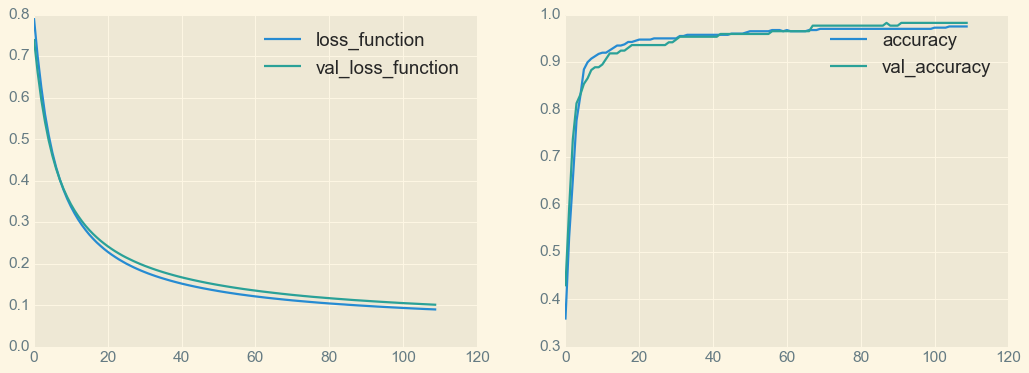

In [57]:
plt.style.use('Solarize_Light2') #just trying new look..
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(14,5))
axs[0].plot(result.history['loss'], label='cost_function')
axs[0].plot(result.history['val_loss'], label='val_cost_function')
axs[1].plot(result.history['accuracy'], label='accuracy')
axs[1].plot(result.history['val_accuracy'], label='val_accuracy')
axs[0].legend(), axs[1].legend()

*Here I am plotting cost function and accuracy. They are going in opposite direction, which make sense.*

<div class="alert alert-block alert-warning"><b>Prediction</b></div>

In [69]:
predicton = my_model.predict(X_test)

In [70]:
print(predicton[:15])

[[7.4891682e-07]
 [9.9893945e-01]
 [1.2785276e-10]
 [9.9530435e-01]
 [9.9527419e-01]
 [9.7641015e-01]
 [1.4687916e-03]
 [9.8247129e-01]
 [9.6705532e-01]
 [9.5802951e-01]
 [9.9965394e-01]
 [9.9363303e-01]
 [5.6452405e-02]
 [9.7876555e-01]
 [9.7708082e-01]]


*Our activation function is sigmoid, meaning that if value is over 0.5 it will be evaluated as 1 - True, and vice versa to False.*

<div class="alert alert-block alert-danger"><b>BeAware:</b>In this case I have to round my values to get an actual predction values</div>

In [80]:
final_prediction = np.round(predicton)

In [82]:
final_prediction[:4], final_prediction.shape

(array([[0.],
        [1.],
        [0.],
        [1.]], dtype=float32),
 (171, 1))

*I will flatten my results, for better looking.*

In [84]:
final_prediction = final_prediction.flatten()

In [85]:
final_prediction.shape

(171,)

In [86]:
final_prediction

array([0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1.], dtype=float32)

In [108]:
print("Accuracy of prediction is:", np.mean(final_prediction == y_test))
#really cool usage of np.mean if predicted correctly we get an 1 and if not we get zero
#for example:
# values    1 1 1 1 1 0 0 0 0 0
#prediction 1 0 1 0 0 1 1 0 0 0
#I can see that I gussed correctly 5 values from 10 ..so I have got 5/10
#because 1/1+1/0+1/1 ....(k/n)/10..

Accuracy of prediction is: 0.9824561403508771


*Saving models.*

In [109]:
my_model.save("Simple_Classification_TF.h5")

In [111]:
model_loaded = tf.keras.models.load_model('Simple_Classification_TF.h5')

In [112]:
model_loaded.layers

*And that is all for simple classification in TensorFlow. It is very straightforward, very similar to Scikit and PySpark.* 

## Simple regression with TernsorFlow

<div class="alert alert-block alert-warning"><b>Data</b></div>

In [224]:
data_year = pd.read_csv("data_year.csv", header=None).values
#.values make my data an numpy.ndarray 

In [225]:
type(data_year)

numpy.ndarray

In [226]:
X = data_year[:,0].reshape(-1,1) #I split features and reshape to only one column data
Y = data_year[:,1].reshape(-1,1) #the same with labels

In [142]:
X[:5], Y[:5]

(array([[1971],
        [1972],
        [1973],
        [1973],
        [1974]], dtype=int64),
 array([[2300],
        [3500],
        [2500],
        [2500],
        [4100]], dtype=int64))

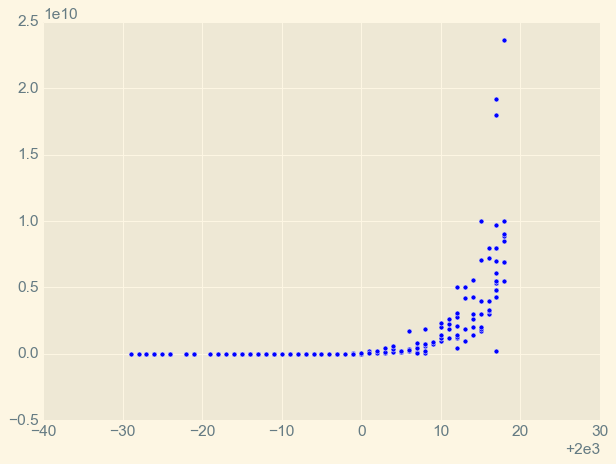

In [212]:
plt.scatter(X, Y)

*Our data are non linear, to be more precise they are clearly exponential. The easiest way how to make data easier to work with is to take a log from them. This is called "Linearization" of exponential funcion.*

<div class="alert alert-block alert-info"><b>Tip:</b> explenation of log values and linearization</div>

In [171]:
import math

In [172]:
math_education = [math.exp(1), math.exp(2), math.exp(3), math.exp(4), math.exp(5)]

In [173]:
math_education

[2.718281828459045,
 7.38905609893065,
 20.085536923187668,
 54.598150033144236,
 148.4131591025766]

*Here I am just taking an Euler's number to power of 1,2,3,4,5. Why e? Because it is base of log so it will be the easiest to show.*

In [179]:
euler_log = np.log(math_education) #taking a log from my values above
#in other words I am asking 2.718 is power to what number so I get 2.718..
#what number do I need to multiply 2,71828 so I will get 7,389?

In [175]:
euler_log 

array([1., 2., 3., 4., 5.])

*So if something is exponential, then the values are power of "something" and these are incrementally increasing and therefore we will get a linear function if we take log values from exponential data.* ***Back to our data:***

In [258]:
Y = np.log(Y)
X = X - X.mean() #just a simple scaling of our years 

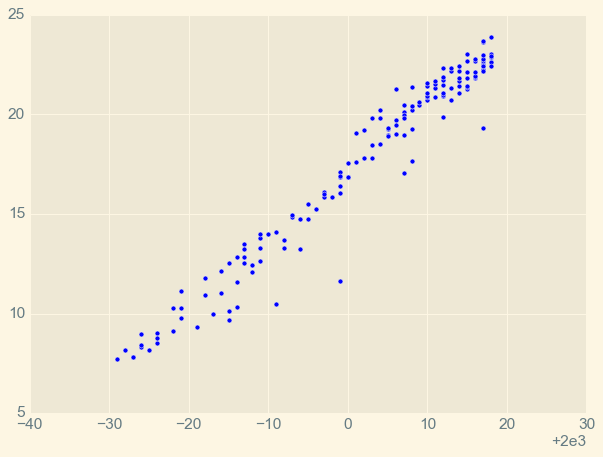

In [197]:
plt.scatter(X, Y)

*Taking a log values from our Y values works perfectly.*

<div class="alert alert-block alert-warning"><b>Testing and evaluating</b></div>

*Data are ready to go, I will proceed with model.*

In [290]:
regre_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),#just specify shape of my data
    tf.keras.layers.Dense(1)
])
#in regression I am not specifying an activation function

In [291]:
regre_model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss="mse")
#my optimizer is SGD - which is Stochastic gradient descent, faster than classic GD
#but probably not so precise, if is not lucky enough? :)

In [292]:
def schedule(epoch, lr):
    if epoch >= 50:
        return 0.0001
    return 0.001
#I guess this is some basic change of learning rate..

In [293]:
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)
#Now I initialize my scheduler

In [294]:
regre_result = regre_model.fit(X,Y, epochs=80, callbacks=[scheduler])
#I am learning learning rate after 50 epochs - it is mainly because of
#trying to avoid of over jumping of convergence point
#I am using only 80 iteration so the result migh not be best - it is not a point in this case

Train on 162 samples
Epoch 1/80
162/162 [==============================] - 0s 1ms/sample - loss: 8.3963
Epoch 2/80
162/162 [==============================] - 0s 56us/sample - loss: 7.4440
Epoch 3/80
162/162 [==============================] - 0s 86us/sample - loss: 6.1713
Epoch 4/80
162/162 [==============================] - 0s 74us/sample - loss: 5.9661
Epoch 5/80
162/162 [==============================] - 0s 68us/sample - loss: 4.8327
Epoch 6/80
162/162 [==============================] - 0s 55us/sample - loss: 3.1836
Epoch 7/80
162/162 [==============================] - 0s 55us/sample - loss: 2.2032
Epoch 8/80
162/162 [==============================] - 0s 68us/sample - loss: 1.9969
Epoch 9/80
162/162 [==============================] - 0s 68us/sample - loss: 1.3367
Epoch 10/80
162/162 [==============================] - 0s 62us/sample - loss: 0.9443
Epoch 11/80
162/162 [==============================] - 0s 55us/sample - loss: 0.7276
Epoch 12/80
162/162 [==============================] -

<div class="alert alert-block alert-info"><b>Note:</b> cost function is not always decreasing,  because it is stochastic gradient descent so it can randomly jump to a higher point</div>

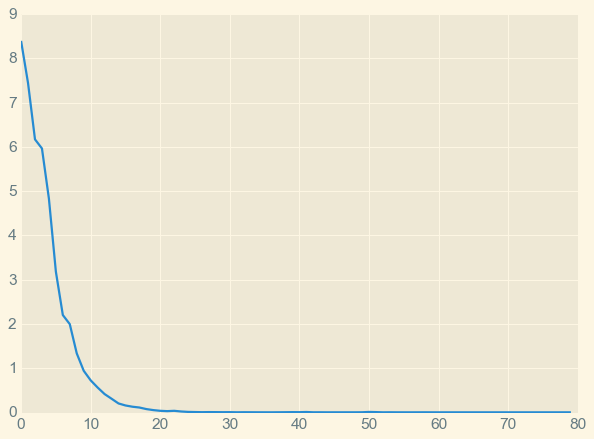

In [295]:
plt.plot(regre_result.history['loss'], label='cost')

*Lets see some weight of our model:*

In [302]:
regre_model.layers
regre_model.layers[0].get_weights()
# array one is w and  array is b
# w is 1x1 matrix and b is 1x vector

[array([[0.02247659]], dtype=float32), array([2.831428], dtype=float32)]

In [296]:
prediction = regre_model.predict(X).flatten()

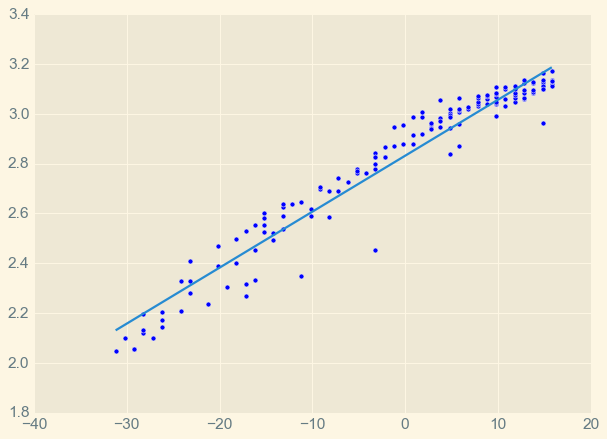

In [297]:
plt.scatter(X,Y)
plt.plot(X, prediction)

*I'm not interested in any other evaluation or calculation in this example. The main purpose is just basic guide for regression with TF.*

<div class="alert alert-block alert-info"><b>Tip:</b> Optimizers links</div>

- SGD https://keras.io/api/optimizers/sgd/
- RMSprop https://keras.io/api/optimizers/rmsprop/
- Adam https://keras.io/api/optimizers/adam/
- Adadelta https://keras.io/api/optimizers/adadelta/
- Adagrad https://keras.io/api/optimizers/adagrad/
- AdaMax https://keras.io/api/optimizers/adamax/
- Nadam https://keras.io/api/optimizers/adamax/
- Ftrl https://keras.io/api/optimizers/adamax/

____________________________

***The End***